In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy.linalg import svd
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
#N being O(1000)
N = 1000
# generate random numbers according to a normal distribution
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

#generating the dataset
data = np.array([x1,x2,x3])
print(data)

[[ 0.70034163 -0.07210386  0.43727134 ... -0.76218265 -0.75947845
  -0.51592808]
 [ 1.6028198  -1.01597176  0.88574315 ...  0.11779224 -4.79524844
  -1.72696728]
 [ 3.00350305 -1.16017947  1.76028583 ... -1.40657307 -6.31420534
  -2.75882345]]


In [3]:
#find the eigenvectors and eigenvalues
#using eigendecomposition of the covariance matrix
cov = np.cov(data)
l, V = la.eig(cov)
l = np.real_if_close(l)

#using the SVD
U, S, Vt = svd(data)
l_svd = S**2/(N-1)
V_svd = U

# Compare Eigenvalues
print("\nCompare Eigenvalues:")
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print("\nCompare Eigenvectors:")
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

#Check that the two procedures yield to same result
#We can see that the Eigenvectors yield to the same result even though the values are not in the same order in 
#the matrix


Compare Eigenvalues:
Eigendecomposition:
 [ 2.89697612e+01 -5.75897027e-16  1.97972576e+00]
SVD:
 [2.90257535e+01 1.97975488e+00 1.30263480e-29]

Compare Eigenvectors:
Eigendecomposition:
 [[-0.11782099 -0.81649658  0.56520045]
 [-0.57440536 -0.40824829 -0.70950111]
 [-0.81004734  0.40824829  0.42089979]]
SVD:
 [[-0.11784771  0.56519488 -0.81649658]
 [-0.57437182 -0.70952825 -0.40824829]
 [-0.81006724  0.4208615   0.40824829]]


In [4]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(cov):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()))

#We need to remove the component 1 to retain 100% of the total variability. Indeed, the component 1
#retain 0% of the total variability. Therefore, if we keep the component 0 and the component 1, we retain 100%
#of the variablity => we have a dimension reduction from 3D to 2D
#it makes sense that we only need to keep x1 and x3 because x3 is a combination of x1 and x2 so it allows use 
#to keep information about x1, x2 and x3 with only two variables x1 and x3. 

#Reduce the dimensionality of the system by keeping only x1 and x3
data_reduce = np.array([x1,x3])

#find the new eigenvectors and eigenvalues of the reduced data (SVD is usually prefered)
U_r, S_r, Vt = svd(data_reduce)
l_r = S_r**2/(N-1)
V_r= U_r

Lambda:
 [[ 2.89697612e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.75897027e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.97972576e+00]] 

Trace(cov):
 30.94948691670964 

Trace(Lambda):
 30.949486916709652 

By selecting the component 0, we retain 0.94% of the total variability
By selecting the component 1, we retain -0.00% of the total variability
By selecting the component 2, we retain 0.06% of the total variability


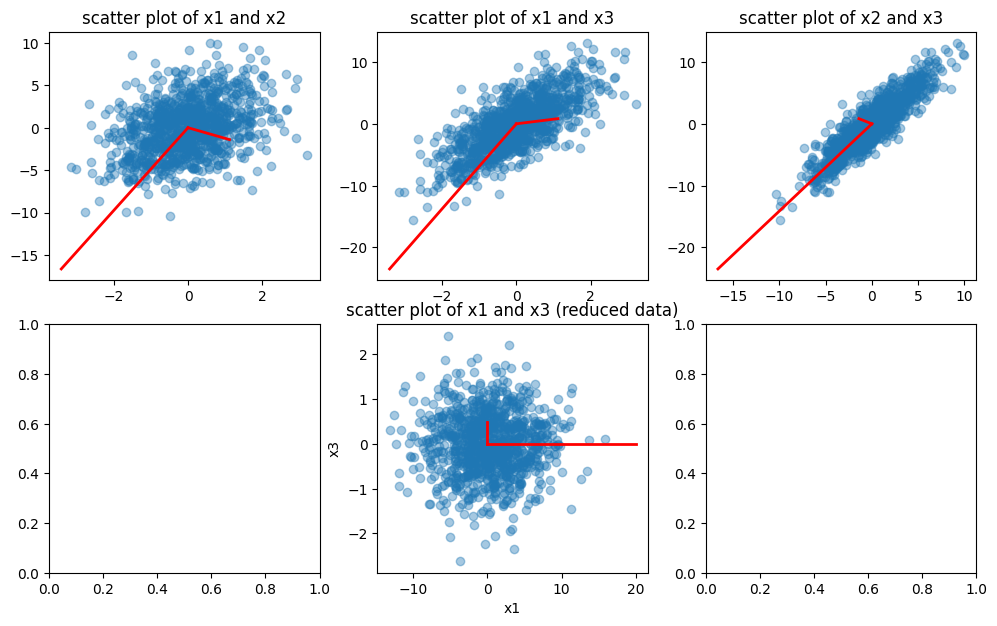

In [5]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
datap = np.dot(V_r.T, data_reduce)

#Scale factor for vizualisation purpose
scale_factor = 1

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig.tight_layout()

#we plot the original data
ax1.scatter(data[0, :], data[1,:], alpha=0.4)
ax1.set_title('scatter plot of x1 and x2');
ax2.scatter(data[0, :], data[2,:], alpha=0.4)
ax2.set_title('scatter plot of x1 and x3');
ax3.scatter(data[1, :], data[2,:], alpha=0.4)
ax3.set_title('scatter plot of x2 and x3');

for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#We plot the reduced data that has been rotated
ax5.scatter(datap[0, :], datap[1,:], alpha=0.4)
ax5.set_title('scatter plot of x1 and x3 (reduced data)');
ax5.set_xlabel('x1')
ax5.set_ylabel('x3')
for li, vi in zip(l_r, np.dot(V_r.T, V_r)): 
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [6]:
#we had to each features 10 uncorrelated variables normally distributed
#scale = 1/20 => factore 20
noise = np.random.normal(loc = 0, scale = 1/20, size=(3,1000,10))
noise_data = data + np.sum(noise, axis=2)
print(noise_data)

#We check that the noise was added
print(np.allclose(data, noise_data))

[[ 0.56933567  0.03428127  0.24085303 ... -0.7441726  -0.80745138
  -0.75951835]
 [ 1.66549021 -0.71078096  0.73559296 ...  0.38865288 -4.76834947
  -2.02516573]
 [ 3.0513254  -1.19498898  1.86616499 ... -1.69427801 -6.14615765
  -2.50547474]]
False


In [7]:
#find the eigenvectors and eigenvalues 
cov_n = np.cov(noise_data)
l_n, V_n = la.eig(cov_n)
l_n = np.real_if_close(l_n)

print("Eigenvalues:\n", l_n)
print("Eigenvectors:\n", V_n)

Eigenvalues:
 [2.90422017e+01 2.33174069e-02 2.01544842e+00]
Eigenvectors:
 [[-0.11835674 -0.81719803  0.56407363]
 [-0.57511943 -0.40666703 -0.70983066]
 [-0.80946237  0.40842295  0.42185468]]


In [8]:
Lambda_n = np.diag(l_n)
print("Lambda:\n", Lambda_n, '\n')
print("Trace(Lambda):\n", Lambda_n.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda_n[0, 0]/Lambda_n.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda_n[1, 1]/Lambda_n.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda_n[2, 2]/Lambda_n.trace()))

#Reduce the dimensionality of the system by keeping only x1 and x3
data_reduce_n = np.array([noise_data[0],noise_data[2]])

#find the eigenvectors and eigenvalues using the SVD (usually preferred)
U_r_n, S_r_n, Vt_n = svd(data_reduce_n)
l_r_n = S_r_n**2/(N-1)
V_r_n= U_r_n

Lambda:
 [[2.90422017e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.33174069e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.01544842e+00]] 

Trace(Lambda):
 31.080967496339788 

By selecting the component 0, we retain 0.93% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 0.06% of the total variability


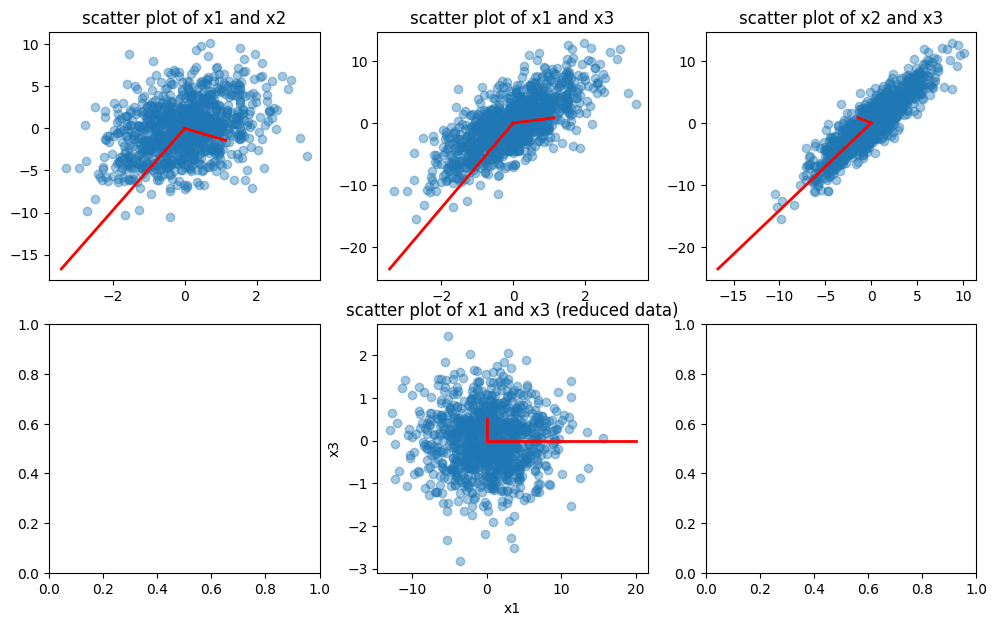

In [9]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
datap_n = np.dot(V_r_n.T, data_reduce_n)

#Scale factor for vizualisation purpose
scale_factor = 1

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
fig.tight_layout()

#we plot the original data
ax1.scatter(noise_data[0, :], noise_data[1,:], alpha=0.4)
ax1.set_title('scatter plot of x1 and x2');
ax2.scatter(noise_data[0, :], noise_data[2,:], alpha=0.4)
ax2.set_title('scatter plot of x1 and x3');
ax3.scatter(noise_data[1, :], noise_data[2,:], alpha=0.4)
ax3.set_title('scatter plot of x2 and x3');

for li, vi in zip(l_n, V_n.T):
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#We plot the reduced data that has been rotated
ax5.scatter(datap_n[0, :], datap_n[1,:], alpha=0.4)
ax5.set_title('scatter plot of x1 and x3 (reduced data)');
ax5.set_xlabel('x1')
ax5.set_ylabel('x3')
for li, vi in zip(l_r_n, np.dot(V_r_n.T, V_r_n)): 
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
#as we can see, we obtain the same result with or without noise using PCA. Indeed, PCA can be used to denoise data 
#and to reduce dimensionality. It does not eliminate the noise but it reduces it. Moreover, the noise that we add 
#has a standard deviation much more smaller than the one used for x1, x2 and x3. Therefore, the principal components
#are not affected by the noise. 

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [10]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 